In [53]:
#importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import metrics
%matplotlib inline

from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True) #This helps with readablity. 

In [54]:
df = pd.read_csv('messidor_features1.csv') #data converted to csv and imported.

In [55]:
df.rename(columns={'0':'Quality','1':'Pre-Screen','2':'MA1','3':'MA2','4':'MA3','5':'MA4','6':'MA5','7':'MA6' 
,'8':'MA7','9':'MA8','10':'MA9','11':'MA10','12':'MA11','13':'MA12','14':'MA13','15':'MA14','16':'MaculaDist','17':'OpticDiscDiam','18':'AM/FM','19':'Output',}, inplace=True)

#Renaming all the collumms
df

,Quality,Pre-Screen,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,MA11,MA12,MA13,MA14,MaculaDist,OpticDiscDiam,AM/FM,Output
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,34,34,34,33,31,24,6.071765,0.937472,0.031145,0.003115,0.000000,0.000000,0.000000,0.000000,0.537470,0.116795,0,0
1147,1,1,49,49,49,49,45,37,63.197145,27.377668,8.067688,0.979548,0.001552,0.000000,0.000000,0.000000,0.516733,0.124190,0,0
1148,1,0,49,48,48,45,43,33,30.461898,13.966980,1.763305,0.137858,0.011221,0.000000,0.000000,0.000000,0.560632,0.129843,0,0
1149,1,1,39,36,29,23,13,7,40.525739,12.604947,4.740919,1.077570,0.563518,0.326860,0.239568,0.174584,0.485972,0.106690,1,1


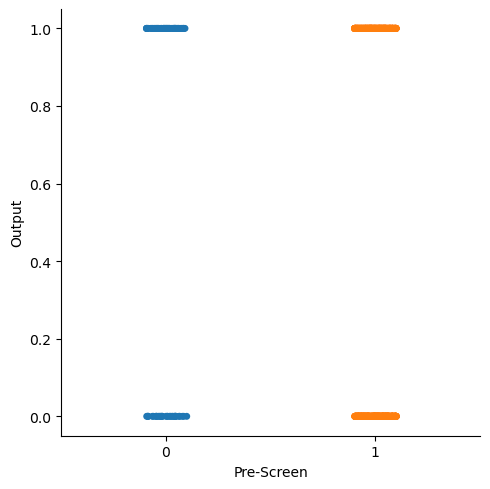

In [56]:
# 1.3	Visualize the distribution of features and classes (with bar charts)
#df_messidor_features.plot.bar(x='lab', y='val', rot=0)

sns.catplot(x = 'Pre-Screen', y = 'Output', data = df)

In [57]:
#Drop the column(s) which you think do not contribute towards classification.
#df_messidor_features(['MA12','MA13','MA14'], axis=1, inplace=True)

df = df.drop(columns=['MA12', 'MA13','MA14'])
#df

In [58]:
#Normalize each feature to the range of [0,1]
df=(df-df.min())/(df.max()-df.min())
print(df)

      Quality  Pre-Screen       MA1       MA2       MA3       MA4       MA5  \
0         1.0         1.0  0.140000  0.160305  0.176471  0.173077  0.177083   
1         1.0         1.0  0.153333  0.175573  0.176471  0.163462  0.156250   
2         1.0         1.0  0.406667  0.450382  0.487395  0.509615  0.479167   
3         1.0         1.0  0.360000  0.396947  0.436975  0.471154  0.437500   
4         1.0         1.0  0.286667  0.328244  0.361345  0.384615  0.395833   
...       ...         ...       ...       ...       ...       ...       ...   
1146      1.0         1.0  0.220000  0.251908  0.277311  0.307692  0.312500   
1147      1.0         1.0  0.320000  0.366412  0.403361  0.461538  0.458333   
1148      1.0         0.0  0.320000  0.358779  0.394958  0.423077  0.437500   
1149      1.0         1.0  0.253333  0.267176  0.235294  0.211538  0.125000   
1150      1.0         1.0  0.040000  0.045802  0.050420  0.057692  0.062500   

           MA6       MA7       MA8       MA9      M

In [59]:
# Extract input features, define inputs and outputs

input_feature_cols = ['Quality','Pre-Screen','MA1','MA2','MA3','MA4','MA5','MA6','MA7','MA8','MA9','MA10','MA11','MaculaDist','OpticDiscDiam','AM/FM']
inputs = df[input_feature_cols]

output_feature_cols = ['Output']
outputs = df[output_feature_cols]
#outputs = df.Output

#output must be a 1D array, I think. 

#This sets up the contents of input and outputs, but Im gonna try converting them to pandas arrays for testing
#inputs = inputs.to_numpy()
#outputs = outputs.to_numpy()

In [60]:
#1.4	Divide the whole dataset into two groups randomly. In the dataset, 80% of the instances are reserved for neural network training and 20% of the instances are reserved for testing the performance of the trained neural network.
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.8, random_state=0)

#X_train  this is our new input and output for training. The test variables are to be used for testing.
#First we must make the data 1D(???)


#May have to turn all of these into arrays
#input_training_array = np.array(X_train)
#output_training_array = np.array(pd.DataFrame(y_train))    #turns the input into an array and the output into a df? Not even sure anymore.
#input_testing_array = np.array(X_test)
#output_testing_array = np.array(pd.DataFrame(y_test))    <- nearly made me cry 
#output_training_array

#Just keep them as dataframes all.

In [9]:
#These weights are for the connection between the inputs and the hidden layer. 
#16 rows of x inputs, 20 hidden neurons for each input

weights_0 = 2 * np.random.random((16, 20)) - 1
weights_1 = 2 * np.random.random((20, 1)) - 1

#weights are randomly chosen

#These weights are for the connection between the hidden layer and the output. not sure if right way around.
#20 rows of 1 output weight. 

#weights_0.shape #(16,20) 
#weights_1.shape #(20, 1)

In [10]:
#1.2	Construct a 3-layers feedforward network with X input neurons, 20 hidden neurons, and Y output neurons. You must identify the values of X and Y yourself (Hint: Lecture # 3 ANN architecture design). Identify an appropriate activation function and justify your choice.
def sigmoid(sum_func):
  return 1 / (1 + np.exp(-sum_func))

def sigmoid_derivative(sigmoid):    ##sigmoid derivative is the sloped result from the sigmoid activation function. 
    return sigmoid * (1 - sigmoid)

In [11]:
#Training the network with the training dataset.
#Here we use X_train and y_train for input and output layers

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_train
    sum_synapse0 = np.dot(input_layer, weights_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weights_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_train - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)
    
    #delta output
    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output

    weights1T = weights_1.T
    delta_output_weight = delta_output.dot(weights1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
    
    #weight update for hidden layer
    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weights_1 = weights_1 + (input_x_delta1 * learning_rate)
    
    #weight update for input layer
    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weights_0 = weights_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: Output    0.483925
dtype: float64


C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch: 10001 Error: Output    0.291807
dtype: float64
Epoch: 20001 Error: Output    0.265276
dtype: float64
Epoch: 30001 Error: Output    0.247157
dtype: float64
Epoch: 40001 Error: Output    0.23374
dtype: float64
Epoch: 50001 Error: Output    0.224956
dtype: float64
Epoch: 60001 Error: Output    0.216709
dtype: float64
Epoch: 70001 Error: Output    0.20817
dtype: float64
Epoch: 80001 Error: Output    0.200121
dtype: float64
Epoch: 90001 Error: Output    0.193028
dtype: float64
Epoch: 100001 Error: Output    0.186656
dtype: float64
Epoch: 110001 Error: Output    0.180377
dtype: float64
Epoch: 120001 Error: Output    0.182246
dtype: float64
Epoch: 130001 Error: Output    0.170222
dtype: float64
Epoch: 140001 Error: Output    0.162135
dtype: float64
Epoch: 150001 Error: Output    0.157328
dtype: float64
Epoch: 160001 Error: Output    0.153248
dtype: float64
Epoch: 170001 Error: Output    0.149711
dtype: float64
Epoch: 180001 Error: Output    0.14677
dtype: float64
Epoch: 190001 Error: O

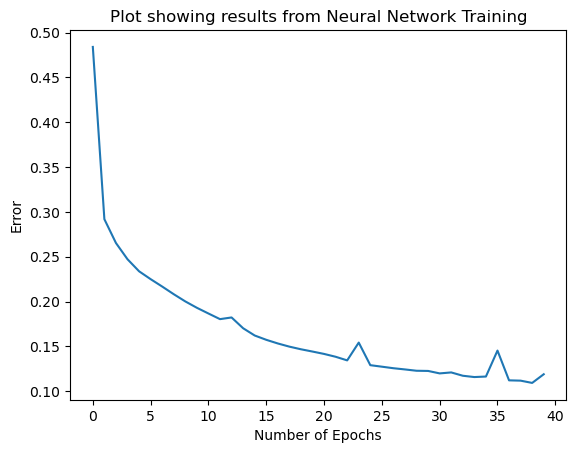

In [12]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Training')
plt.plot(error)
plt.show()

In [13]:
#Testing

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_test
    sum_synapse0 = np.dot(input_layer, weights_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weights_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_test - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)

Epoch: 1 Error: Output    0.294679
dtype: float64
Epoch: 10001 Error: Output    0.294679
dtype: float64
Epoch: 20001 Error: Output    0.294679
dtype: float64
Epoch: 30001 Error: Output    0.294679
dtype: float64
Epoch: 40001 Error: Output    0.294679
dtype: float64
Epoch: 50001 Error: Output    0.294679
dtype: float64
Epoch: 60001 Error: Output    0.294679
dtype: float64
Epoch: 70001 Error: Output    0.294679
dtype: float64
Epoch: 80001 Error: Output    0.294679
dtype: float64
Epoch: 90001 Error: Output    0.294679
dtype: float64
Epoch: 100001 Error: Output    0.294679
dtype: float64
Epoch: 110001 Error: Output    0.294679
dtype: float64
Epoch: 120001 Error: Output    0.294679
dtype: float64
Epoch: 130001 Error: Output    0.294679
dtype: float64
Epoch: 140001 Error: Output    0.294679
dtype: float64
Epoch: 150001 Error: Output    0.294679
dtype: float64
Epoch: 160001 Error: Output    0.294679
dtype: float64
Epoch: 170001 Error: Output    0.294679
dtype: float64
Epoch: 180001 Error: Out

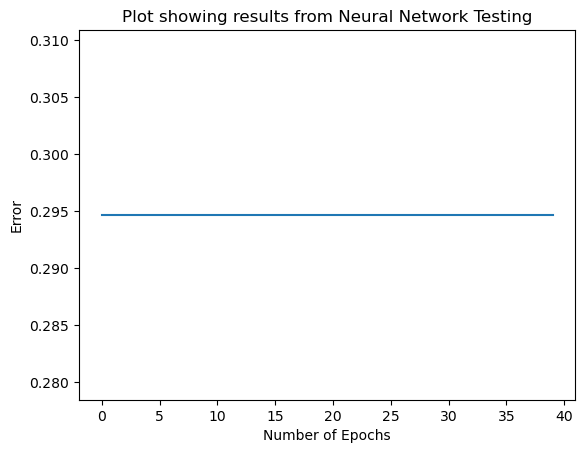

In [14]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Testing')
plt.plot(error)
plt.show()

In [15]:
# This function accepts an instance of a dataset

def calculate_output(instance):
    #input to hidden layer
    hidden_layer = sigmoid(np.dot(instance, weights_0))
    #hidden to output layer
    output_layer = sigmoid(np.dot(hidden_layer, weights_1))
    return output_layer[0]

#round(calculate_output(np.array([1, 1])))
#round(calculate_output(inputs[2]))

In [16]:
#Take predictions from our network and use it to do accuracy measures. 

preds = pd.DataFrame(output_layer, columns = ['Model Outputs'])  ##so what the model predicts is in its own dataframe called outputs
preds['prediction'] = 1
preds.loc[preds['Model Outputs'] < 0.5, 'prediction'] = 0 #if model output is less than 0.5 make the prediciton 0 
#Model outputs are using scientific notations. I tried to turn it off but it wont work. 

actual = pd.DataFrame(y_test)##making a dataframe out of the actual outputs
both = pd.merge(actual,preds, left_index = True, right_index = True)

#I have no idea why the outputs are listed in an order like this. 

In [17]:
both['True Prediction'] = False
both.loc[both['Output'] == both['prediction'], 'True Prediction'] = True
both['True Prediction'].value_counts(normalize = True)*100

False    56.756757
True     43.243243
Name: True Prediction, dtype: float64

In [18]:
#np.info(y_test)
#np.info(output_layer)

##CONFUSION MATRIX

#Use the predicted 0,1 output to compare to the actual 0,1 output.
#taking the actual outcomes and the models predictions. 


model_prediction = preds.drop(columns = ['Model Outputs'])

print(metrics.confusion_matrix(y_test, model_prediction))

#model_output = pd.DataFrame(output_layer, columns = ['Model Outputs'])
#actual_output = pd.DataFrame(y_test)

[[78 23]
 [44 86]]


In [19]:
confusion = metrics.confusion_matrix(y_test, model_prediction)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#TP = 124
#TN = 91
#FP = 10
#FN = 6

[[78 23]
 [44 86]]


<AxesSubplot:>

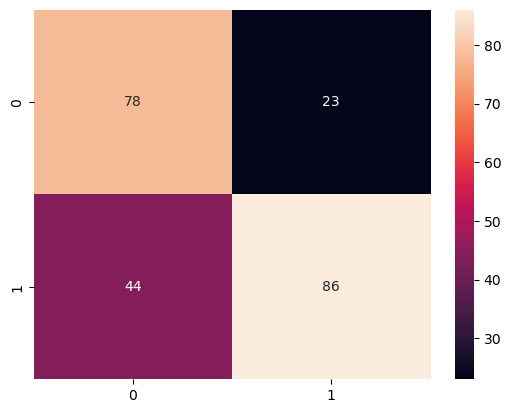

In [20]:
sns.heatmap(confusion, annot=True)

In [21]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, model_prediction))

#Our Accuracy

0.70995670995671
0.70995670995671


In [22]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, model_prediction))

#Our classifcation error rate

0.29004329004329005
0.29004329004329


In [23]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, model_prediction))

#Our sensitivity

0.6615384615384615
0.6615384615384615


In [24]:
specificity = TN / (TN + FP)
print(specificity)

#Our specificity

0.7722772277227723


In [25]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

#Our false positive rates

0.22772277227722773
0.2277227722772277


In [26]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, model_prediction))

#Our precision

0.7889908256880734
0.7889908256880734


In [27]:
from sklearn.metrics import f1_score
F1_score = 2*((precision*sensitivity)/(precision+sensitivity))
print(F1_score)
print(metrics.f1_score(y_test, model_prediction))

0.7196652719665272
0.7196652719665272


In [28]:
auc = metrics.roc_auc_score(y_test, model_prediction)
print('AUC:' + str(auc))

AUC:0.716907844630617


In [29]:
#Time to do it all again. New weights, less of them

In [30]:
#this time there are only going to be 12 hidden neurons. 
weightsA_0 = 2 * np.random.random((16, 12)) - 1
weightsA_1 = 2 * np.random.random((12, 1)) - 1


#Re-establishing input and output, just in case(not just in case its breaking on me, help!).
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, train_size=0.8, random_state=0)

In [31]:
#Training the network with 12 hidden neurons

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_train
    sum_synapse0 = np.dot(input_layer, weightsA_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weightsA_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_train - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)
    
    #delta output
    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output

    weightsA1T = weightsA_1.T
    delta_output_weight = delta_output.dot(weightsA1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
    
    #weight update for hidden layer
    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weightsA_1 = weightsA_1 + (input_x_delta1 * learning_rate)
    
    #weight update for input layer
    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weightsA_0 = weightsA_0 + (input_x_delta0 * learning_rate)

Epoch: 1 Error: Output    0.499689
dtype: float64


C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch: 10001 Error: Output    0.295971
dtype: float64
Epoch: 20001 Error: Output    0.267949
dtype: float64
Epoch: 30001 Error: Output    0.251372
dtype: float64
Epoch: 40001 Error: Output    0.242132
dtype: float64
Epoch: 50001 Error: Output    0.234111
dtype: float64
Epoch: 60001 Error: Output    0.227744
dtype: float64
Epoch: 70001 Error: Output    0.222062
dtype: float64
Epoch: 80001 Error: Output    0.215457
dtype: float64
Epoch: 90001 Error: Output    0.20948
dtype: float64
Epoch: 100001 Error: Output    0.204122
dtype: float64
Epoch: 110001 Error: Output    0.199229
dtype: float64
Epoch: 120001 Error: Output    0.195074
dtype: float64
Epoch: 130001 Error: Output    0.191451
dtype: float64
Epoch: 140001 Error: Output    0.188162
dtype: float64
Epoch: 150001 Error: Output    0.185009
dtype: float64
Epoch: 160001 Error: Output    0.181922
dtype: float64
Epoch: 170001 Error: Output    0.178515
dtype: float64
Epoch: 180001 Error: Output    0.176941
dtype: float64
Epoch: 190001 Error:

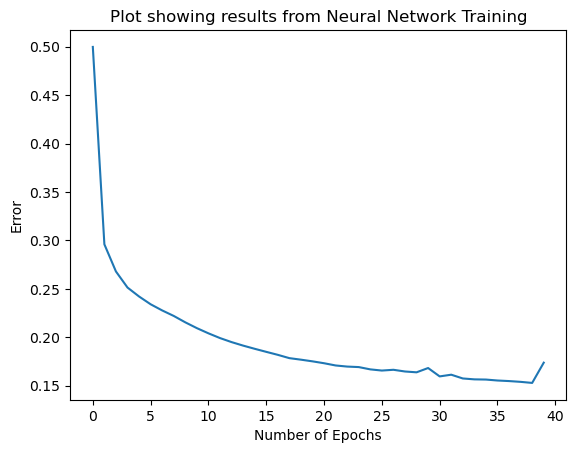

In [32]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Training')
plt.plot(error)
plt.show()

In [33]:
#Testing the network with 12 hidden neurons

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_test
    sum_synapse0 = np.dot(input_layer, weightsA_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weightsA_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_test - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)

Epoch: 1 Error: Output    0.336031
dtype: float64
Epoch: 10001 Error: Output    0.336031
dtype: float64
Epoch: 20001 Error: Output    0.336031
dtype: float64
Epoch: 30001 Error: Output    0.336031
dtype: float64
Epoch: 40001 Error: Output    0.336031
dtype: float64
Epoch: 50001 Error: Output    0.336031
dtype: float64
Epoch: 60001 Error: Output    0.336031
dtype: float64
Epoch: 70001 Error: Output    0.336031
dtype: float64
Epoch: 80001 Error: Output    0.336031
dtype: float64
Epoch: 90001 Error: Output    0.336031
dtype: float64
Epoch: 100001 Error: Output    0.336031
dtype: float64
Epoch: 110001 Error: Output    0.336031
dtype: float64
Epoch: 120001 Error: Output    0.336031
dtype: float64
Epoch: 130001 Error: Output    0.336031
dtype: float64
Epoch: 140001 Error: Output    0.336031
dtype: float64
Epoch: 150001 Error: Output    0.336031
dtype: float64
Epoch: 160001 Error: Output    0.336031
dtype: float64
Epoch: 170001 Error: Output    0.336031
dtype: float64
Epoch: 180001 Error: Out

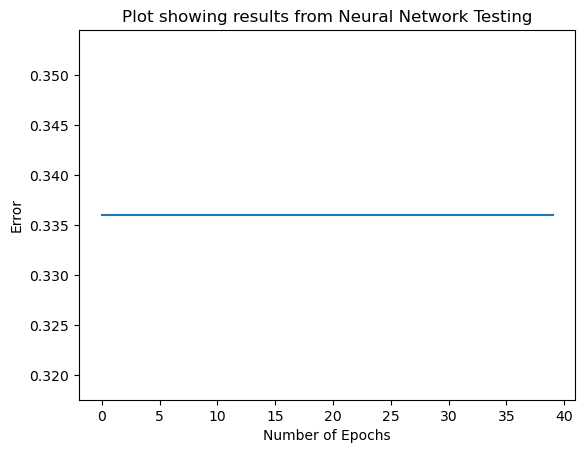

In [34]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Testing')
plt.plot(error)
plt.show()

In [35]:
preds = pd.DataFrame(output_layer, columns = ['Model Outputs']) 
preds['prediction'] = 1
preds.loc[preds['Model Outputs'] < 0.5, 'prediction'] = 0 

model_prediction = preds.drop(columns = ['Model Outputs'])
print(metrics.confusion_matrix(y_test, model_prediction))

[[63 38]
 [35 95]]


In [36]:
confusion = metrics.confusion_matrix(y_test, model_prediction)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[63 38]
 [35 95]]


<AxesSubplot:>

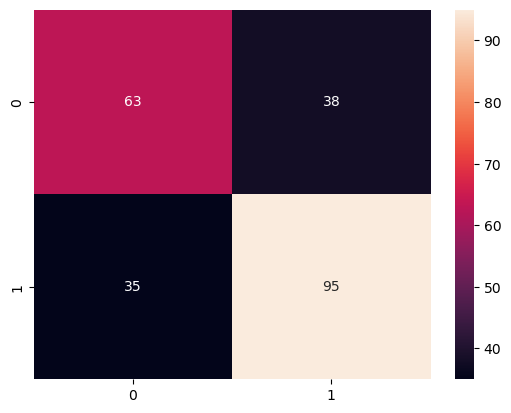

In [37]:
sns.heatmap(confusion, annot=True)

In [38]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, model_prediction))

#Our Accuracy

0.683982683982684
0.683982683982684


In [49]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, model_prediction))

#Our precision

0.7045454545454546
0.7045454545454546


In [61]:
#this time there are  going to be 30 hidden neurons. 
weightsB_0 = 2 * np.random.random((16, 30)) - 1
weightsB_1 = 2 * np.random.random((30, 1)) - 1

In [62]:
#Training the network with 30 hidden neurons

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_train
    sum_synapse0 = np.dot(input_layer, weightsB_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weightsB_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_train - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)
    
    #delta output
    derivative_output = sigmoid_derivative(output_layer)
    delta_output = error_output_layer * derivative_output

    weightsB1T = weightsB_1.T
    delta_output_weight = delta_output.dot(weightsB1T)
    delta_hidden_layer = delta_output_weight * sigmoid_derivative(hidden_layer)
    
    #weight update for hidden layer
    hidden_layerT = hidden_layer.T
    input_x_delta1 = hidden_layerT.dot(delta_output)
    weightsB_1 = weightsB_1 + (input_x_delta1 * learning_rate)
    
    #weight update for input layer
    input_layerT = input_layer.T
    input_x_delta0 = input_layerT.dot(delta_hidden_layer)
    weightsB_0 = weightsB_0 + (input_x_delta0 * learning_rate)

C:\Users\Owner\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Epoch: 1 Error: Output    0.483726
dtype: float64
Epoch: 10001 Error: Output    0.307334
dtype: float64
Epoch: 20001 Error: Output    0.279708
dtype: float64
Epoch: 30001 Error: Output    0.250908
dtype: float64
Epoch: 40001 Error: Output    0.230131
dtype: float64
Epoch: 50001 Error: Output    0.215468
dtype: float64
Epoch: 60001 Error: Output    0.201166
dtype: float64
Epoch: 70001 Error: Output    0.187356
dtype: float64
Epoch: 80001 Error: Output    0.175681
dtype: float64
Epoch: 90001 Error: Output    0.166284
dtype: float64
Epoch: 100001 Error: Output    0.157858
dtype: float64
Epoch: 110001 Error: Output    0.14847
dtype: float64
Epoch: 120001 Error: Output    0.139457
dtype: float64
Epoch: 130001 Error: Output    0.131835
dtype: float64
Epoch: 140001 Error: Output    0.125691
dtype: float64
Epoch: 150001 Error: Output    0.118721
dtype: float64
Epoch: 160001 Error: Output    0.110237
dtype: float64
Epoch: 170001 Error: Output    0.100692
dtype: float64
Epoch: 180001 Error: Outp

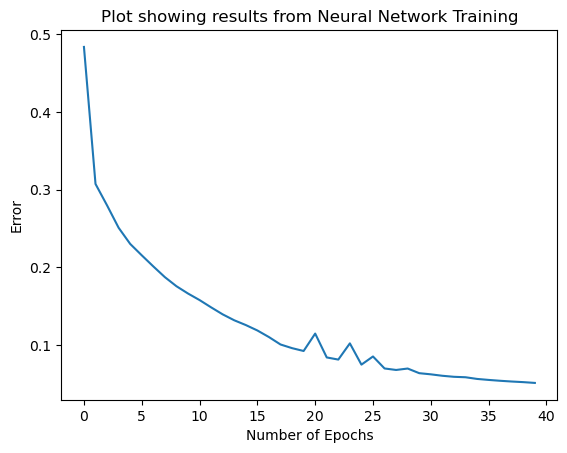

In [63]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Training')
plt.plot(error)
plt.show()

In [64]:
#Testing the network with 30 hidden neurons

epochs = 400000
learning_rate = 0.01
error = []

for epoch in range(epochs):
    #input to hidden
    input_layer = X_test
    sum_synapse0 = np.dot(input_layer, weightsB_0)
    hidden_layer = sigmoid(sum_synapse0)
    
    #hidden to output
    sum_synapse1 = np.dot(hidden_layer, weightsB_1)
    output_layer = sigmoid(sum_synapse1)
    
    #average error
    error_output_layer = y_test - output_layer
    average = np.mean(abs(error_output_layer))
    #print after every specified range of the value
    if epoch % 10000 == 0:
        print('Epoch: ' + str(epoch + 1) + ' Error: ' + str(average))
        error.append(average)

Epoch: 1 Error: Output    0.360735
dtype: float64
Epoch: 10001 Error: Output    0.360735
dtype: float64
Epoch: 20001 Error: Output    0.360735
dtype: float64
Epoch: 30001 Error: Output    0.360735
dtype: float64
Epoch: 40001 Error: Output    0.360735
dtype: float64
Epoch: 50001 Error: Output    0.360735
dtype: float64
Epoch: 60001 Error: Output    0.360735
dtype: float64
Epoch: 70001 Error: Output    0.360735
dtype: float64
Epoch: 80001 Error: Output    0.360735
dtype: float64
Epoch: 90001 Error: Output    0.360735
dtype: float64
Epoch: 100001 Error: Output    0.360735
dtype: float64
Epoch: 110001 Error: Output    0.360735
dtype: float64
Epoch: 120001 Error: Output    0.360735
dtype: float64
Epoch: 130001 Error: Output    0.360735
dtype: float64
Epoch: 140001 Error: Output    0.360735
dtype: float64
Epoch: 150001 Error: Output    0.360735
dtype: float64
Epoch: 160001 Error: Output    0.360735
dtype: float64
Epoch: 170001 Error: Output    0.360735
dtype: float64
Epoch: 180001 Error: Out

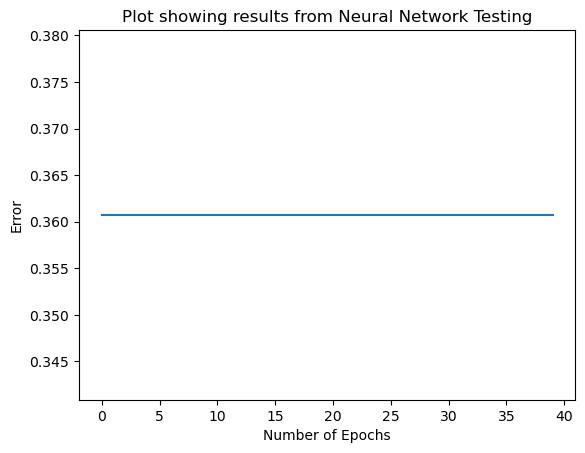

In [65]:
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.title('Plot showing results from Neural Network Testing')
plt.plot(error)
plt.show()

In [66]:
preds = pd.DataFrame(output_layer, columns = ['Model Outputs']) 
preds['prediction'] = 1
preds.loc[preds['Model Outputs'] < 0.5, 'prediction'] = 0 

model_prediction = preds.drop(columns = ['Model Outputs'])
print(metrics.confusion_matrix(y_test, model_prediction))

[[63 38]
 [46 84]]


In [67]:
confusion = metrics.confusion_matrix(y_test, model_prediction)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[63 38]
 [46 84]]


<AxesSubplot:>

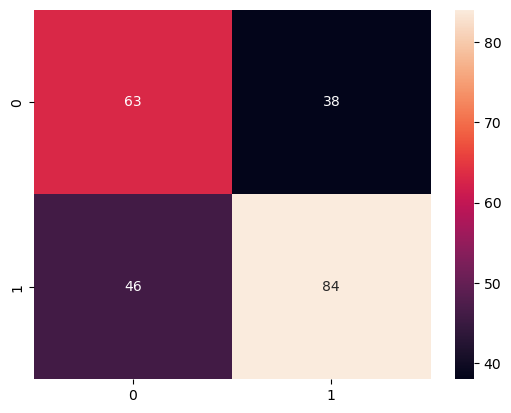

In [68]:
sns.heatmap(confusion, annot=True)

In [69]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, model_prediction))

#Our Accuracy

0.6363636363636364
0.6363636363636364


## ALL DONE